In [1]:
 import matplotlib.pyplot as plt
from mpi4py import MPI
from eigentools import Eigenproblem, CriticalFinder
import dedalus.public as de
import numpy as np
import time


2022-10-17 10:16:05,087 dedalus 0/1 WARNING :: Threading has not been disabled. This may massively degrade Dedalus performance.
2022-10-17 10:16:05,088 dedalus 0/1 WARNING :: We strongly suggest setting the "OMP_NUM_THREADS" environment variable to "1".


In [19]:
z = de.Chebyshev('z', 128)
d = de.Domain([z],comm=MPI.COMM_SELF)
alpha = 1.02
Re = 1000
orr_somerfeld = de.EVP(d,['w','wz','wzz','wzzz'],'c')
orr_somerfeld.parameters['alpha'] = alpha

orr_somerfeld.parameters['Re'] = Re
orr_somerfeld.substitutions['umean']= '1 - z**2'
orr_somerfeld.substitutions['umeanzz']= '-2'
orr_somerfeld.add_equation('dz(wzzz) - 2*alpha**2*wzz + alpha**4*w -1j*alpha*Re*((umean-c)*(wzz - alpha**2*w) - umeanzz*w) = 0')
orr_somerfeld.add_equation('dz(w)-wz = 0')
orr_somerfeld.add_equation('dz(wz)-wzz = 0')
orr_somerfeld.add_equation('dz(wzz)-wzzz = 0')
orr_somerfeld.add_bc('left(w) = 0')
orr_somerfeld.add_bc('right(w) = 0')
orr_somerfeld.add_bc('left(wz) = 0')
orr_somerfeld.add_bc('right(wz) = 0')
# create an Eigenproblem object
EP = Eigenproblem(orr_somerfeld)


2022-10-17 10:32:24,985 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2022-10-17 10:32:25,003 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10


In [20]:
EP.solve(sparse=False)

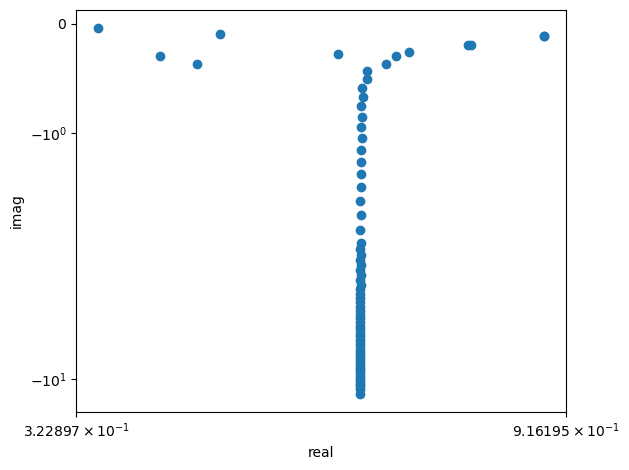

In [21]:
ax=EP.plot_spectrum()

In [22]:
np.max(np.imag(EP.evalues))

-0.04041344412222018

In [23]:
EP.evalues

array([0.34986515 -0.04041344j, 0.4248604  -0.29636678j,
       0.46882052 -0.36754987j, 0.49648149 -0.09671696j,
       0.6394834  -0.27503053j, 0.66665592-11.85081889j,
       0.66665623-11.18305893j, 0.66665656-10.53464092j,
       0.66665705 -9.90556373j, 0.66665772 -9.29582589j,
       0.66665864 -8.7054257j , 0.66665986 -8.13436116j,
       0.66666146 -7.58262989j, 0.66666354 -7.05022912j,
       0.66666623 -6.53715552j, 0.66666971 -6.04340509j,
       0.66667418 -5.56897303j, 0.66667993 -5.11385349j,
       0.66668734 -4.67803933j, 0.66669691 -4.26152169j,
       0.66670931 -3.86428958j, 0.66672543 -3.48632912j,
       0.66674653 -3.12762269j, 0.6667743  -2.78814757j,
       0.66679165-10.8553842j , 0.66680118-10.21663797j,
       0.66681089 -9.59723213j, 0.66681113 -2.46787405j,
       0.6668218  -8.9971651j , 0.66683399 -8.41643506j,
       0.66684767 -7.85503991j, 0.66686042 -2.16676274j,
       0.66686311 -7.31297717j, 0.66688059 -6.7902439j ,
       0.66690049 -6.28683661j,